In [22]:
import xarray as xr
import os
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.style.use('../grl.mplstyle') # Plotting style

from helper import compute_dEdt, compute_waves, compute_Phi
from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
DIR = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
labels = ['C1','C2','C3','C4_rand4','C4','C5','C5_rand4']
tbins = [100, 120, 140, 160, 180]
tcs = [110, 130, 150, 170]

N = 2**10
L0 = 200

### Energy against fifth moment

In [20]:
def fifth_moment(hist, tbins, N, L0):
    fifth_ensem = []
    for i in range(len(tbins)-1):
        hist_aver = hist.hist.sel(t=slice(tbins[i],tbins[i+1])).mean(dim='t')
        lambdac = hist_aver/N/L0/(hist.c[2] - hist.c[1])
        fifth_ensem.append((lambdac*hist.c**5).sum().values)  
    return fifth_ensem

In [21]:
#### Collect all samples over different cases and time windows ###3
sigma_all = []
fifth_all  = []
dEdt_all = []

for label in labels:
    print(label)
    filename = DIR + label + '/series.nc'
    ds = xr.open_dataset(filename, engine='h5netcdf')
    filename = DIR + label + '/breaking_hist.nc'
    hist = xr.open_dataset(filename, engine='h5netcdf')
    
    dEdts = compute_dEdt(ds, tbins) # Compute dE/dt 
    sigmas, Hss = compute_waves(ds, tbins) # Compute sigma and Hs
    fifth_ensem = fifth_moment(hist, tbins, N, L0) # Compute fifth moment
    sigma_all.append(sigmas); fifth_all.append(fifth_ensem); dEdt_all.append(dEdts)
    
fifth_all = np.array(fifth_all).flatten()
dEdt_all = - np.array(dEdt_all).flatten()
sigma_all = np.array(sigma_all).flatten()
    
Phi_ensem = compute_Phi(labels, tcs, DIR)
Phi_all = np.array([Phi['phis'] for Phi in Phi_ensem]).flatten()

C1
C2
C3
C4_rand4
C4
C5
C5_rand4


In [28]:
#### Collect all samples over different cases and time windows ###3

def compute_cases (labels):
    sigma_all = []
    fifth_all  = []
    dEdt_all = []

    for label in labels:
        print(label)
        filename = DIR + label + '/series.nc'
        ds = xr.open_dataset(filename, engine='h5netcdf')
        filename = DIR + label + '/breaking_hist.nc'
        hist = xr.open_dataset(filename, engine='h5netcdf')
        
        dEdts = compute_dEdt(ds, tbins) # Compute dE/dt 
        sigmas, Hss = compute_waves(ds, tbins) # Compute sigma and Hs
        fifth_ensem = fifth_moment(hist, tbins, N, L0) # Compute fifth moment
        sigma_all.append(sigmas); fifth_all.append(fifth_ensem); dEdt_all.append(dEdts)
        
    fifth_all = np.array(fifth_all).flatten()
    dEdt_all = - np.array(dEdt_all).flatten()
    sigma_all = np.array(sigma_all).flatten()
        
    Phi_ensem = compute_Phi(labels, tcs, DIR)
    Phi_all = np.array([Phi['phis'] for Phi in Phi_ensem]).flatten()
    return sigma_all, fifth_all, dEdt_all, Phi_all

sigma_all2, fifth_all2, dEdt_all2, Phi_all2 = compute_cases(['C4', 'C4_NL30','C4_NL45'])

C4
C4_NL30


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4_NL30/breaking_hist.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [25]:
sigma_all

array([0.09928279, 0.10036965, 0.10206916, 0.10272755, 0.11578664,
       0.11859132, 0.12057884, 0.12129937, 0.14679001, 0.14645354,
       0.1467119 , 0.14508547, 0.15409102, 0.15148375, 0.15112709,
       0.14944946, 0.15481878, 0.15374556, 0.15330592, 0.15082244,
       0.16389945, 0.16227242, 0.16291125, 0.16063112, 0.16108956,
       0.1607419 , 0.15749227, 0.15603028])

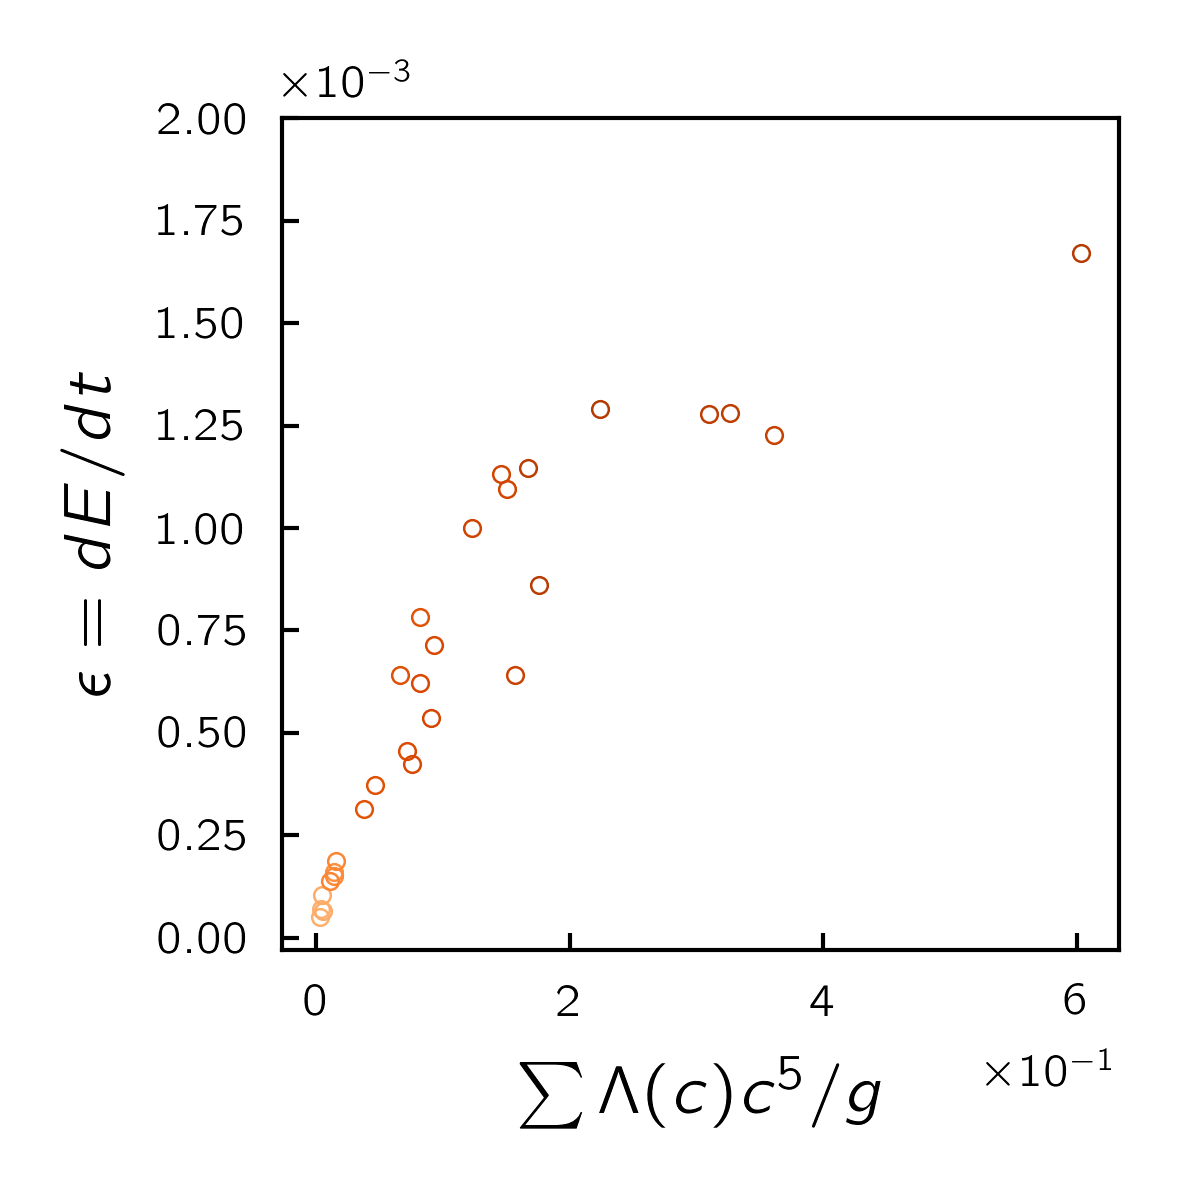

In [27]:
fig = plt.figure(figsize=[1.8,1.8]); ax = plt.gca()

# Fit a line that intercepts (0,0)
for i in range(len(fifth_all)):
    ax.plot(fifth_all[i]/9.8, dEdt_all[i], 'o', c=mpl.colormaps['Oranges']((sigma_all[i]-0.05)/(0.185-0.05)))

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlabel('$\sum \Lambda(c)c^5/g$'); ax.set_ylabel('$\epsilon=dE/dt$')
# ax.text(0.5,0.9,'$b_\mathrm{fit}=%.4f$' %popt, transform=ax.transAxes, fontsize=6)
# ax.plot(np.linspace(0,1.2*10**(-3),100), np.linspace(0,1.2*10**(-3),100), '--', c='gray', alpha=0.5)
# ax.set_xlim([0,1.25*10**(-3)]); ax.set_ylim([0,1.25*10**(-3)])
ax.set_yticks([0, 0.25*10**(-3), 0.5*10**(-3), 0.75*10**(-3), 1*10**(-3), 1.25*10**(-3), 1.5*10**(-3), 1.75*10**(-3), 2*10**(-3)])
plt.show()

/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_67656/2797889489.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(0.5,0.9,'$b_\mathrm{fit}=%.4f$' %popt, transform=ax.transAxes, fontsize=6)


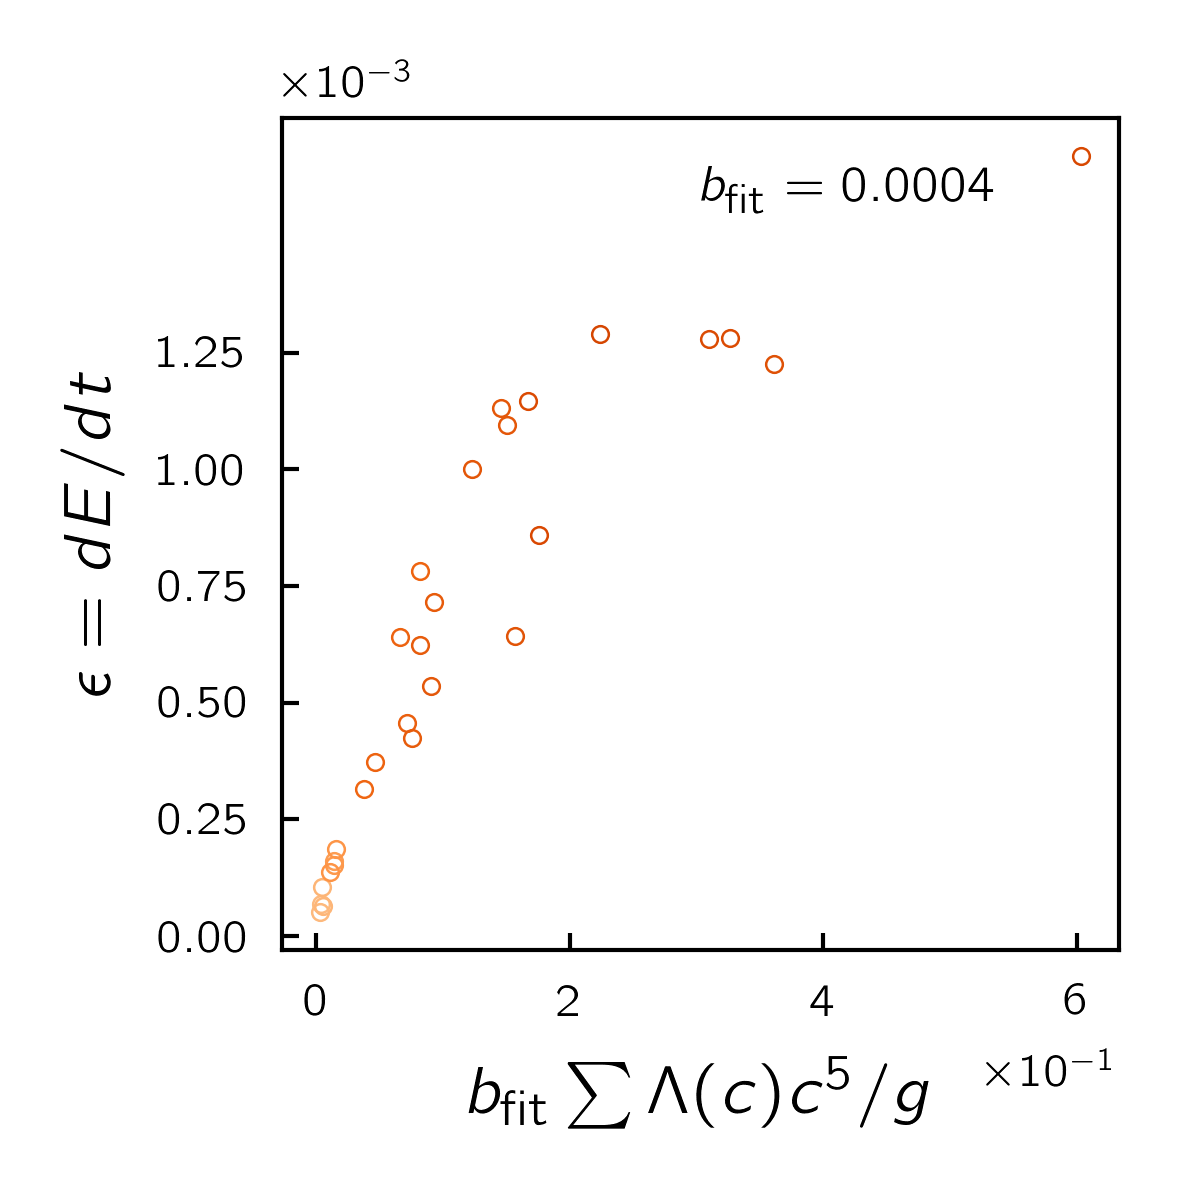

In [ ]:

fig = plt.figure(figsize=[1.8,1.8]); ax = plt.gca()

# Fit a line that intercepts (0,0)
for i in range(len(fifth_all[:])):
    ax.plot(fifth_all[i]/9.8, dEdt_all[i], 'o', c=mpl.colormaps['Oranges']((sigma_all[i]-0.05)/(0.2-0.05)))

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlabel('$b_\mathrm{fit}\sum \Lambda(c)c^5/g$'); ax.set_ylabel('$\epsilon=dE/dt$')
ax.text(0.5,0.9,'$b_\mathrm{fit}=%.4f$' %popt, transform=ax.transAxes, fontsize=6)
# ax.plot(np.linspace(0,1.2*10**(-3),100), np.linspace(0,1.2*10**(-3),100), '--', c='gray', alpha=0.5)
ax.set_xlim([0,1*10**(-3)]); ax.set_ylim([0,2*10**(-3)])
ax.set_yticks([0, 0.25*10**(-3), 0.5*10**(-3), 0.75*10**(-3), 1*10**(-3), 1.25*10**(-3), 1.5*10**(-3), 1.75*10**(-3), 2*10**(-3)])
plt.show()

### Energy against fifth moment

/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_67656/1187168233.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Linear fit through (0,0) slope is %g' %popt)
/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_67656/1187168233.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(0.5,0.9,'$b_\mathrm{fit}=%.4f$' %popt, transform=ax.transAxes, fontsize=6)


Linear fit through (0,0) slope is 0.000415633


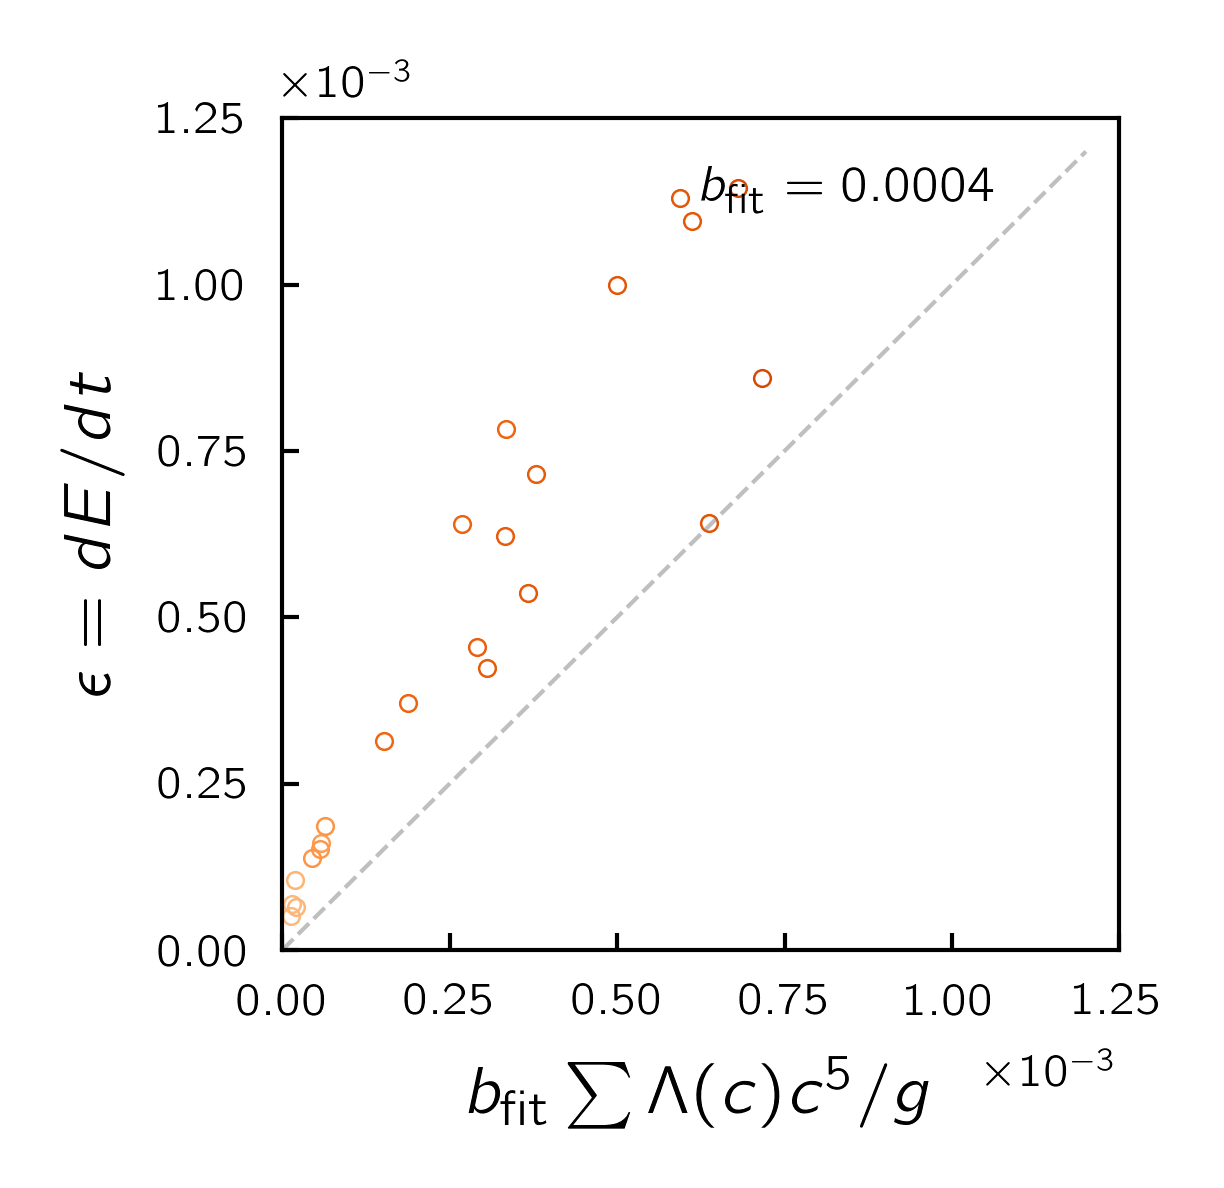

In [9]:
fig = plt.figure(figsize=[1.8,1.8]); ax = plt.gca()

# Fit a line that intercepts (0,0)

def func(x, a):
    return a * x

popt, pcov = curve_fit(func, fifth_all, dEdt_all)
print('Linear fit through (0,0) slope is %g' %popt)

for i in range(len(fifth_all)):
    ax.plot(fifth_all[i]*popt, dEdt_all[i], 'o', c=mpl.colormaps['Oranges']((sigma_all[i]-0.05)/(0.2-0.05)))

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlabel('$b_\mathrm{fit}\sum \Lambda(c)c^5/g$'); ax.set_ylabel('$\epsilon=dE/dt$')
ax.text(0.5,0.9,'$b_\mathrm{fit}=%.4f$' %popt, transform=ax.transAxes, fontsize=6)
ax.plot(np.linspace(0,1.2*10**(-3),100), np.linspace(0,1.2*10**(-3),100), '--', c='gray', alpha=0.5)
ax.set_xlim([0,1.25*10**(-3)]); ax.set_ylim([0,1.25*10**(-3)])
ax.set_yticks([0,0.25*10**(-3),0.5*10**(-3),0.75*10**(-3),1*10**(-3),1.25*10**(-3)])
plt.show()

### Energy against Phi

In [ ]:

print('Linear fit through (0,0) slope is %g, with intersection %g' %(popt[0], popt[1]))

In [ ]:
''' Energy against Phi, Phi is computed by fig3.ipynb and stored in datalocal '''
    
fig = plt.figure(figsize=[1.6,1.6]); ax = plt.gca()

def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, Phi_all, dEdt_all)

for i in range(len(Phi_all)):
    ax.plot(Phi_all[i]*popt[0]+popt[1], dEdt_all[i], 'o', c=mpl.colormaps['Oranges']((sigma_all[i]-0.05)/(0.2-0.05)))          

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlim([0,0.0012]); ax.set_ylim([0,0.0012])
ax.set_xlabel(r'$\nu_\mathrm{fit}\int |\mathbf{\Omega}|^2 dz$', fontsize=6)
ax.set_ylabel('$\epsilon=dE/dt$',fontsize=6)
ax.text(0.5,0.9,r'$\nu_\mathrm{fit}=%.4f$' %nufit, transform=ax.transAxes, fontsize=6)
ax.plot(np.linspace(0,1.2*10**(-3),100), np.linspace(0,1.2*10**(-3),100), '--', c='gray', alpha=0.5)
# plt.savefig('../figures/multilayer-diss/fig5b.pdf', bbox_inches='tight')

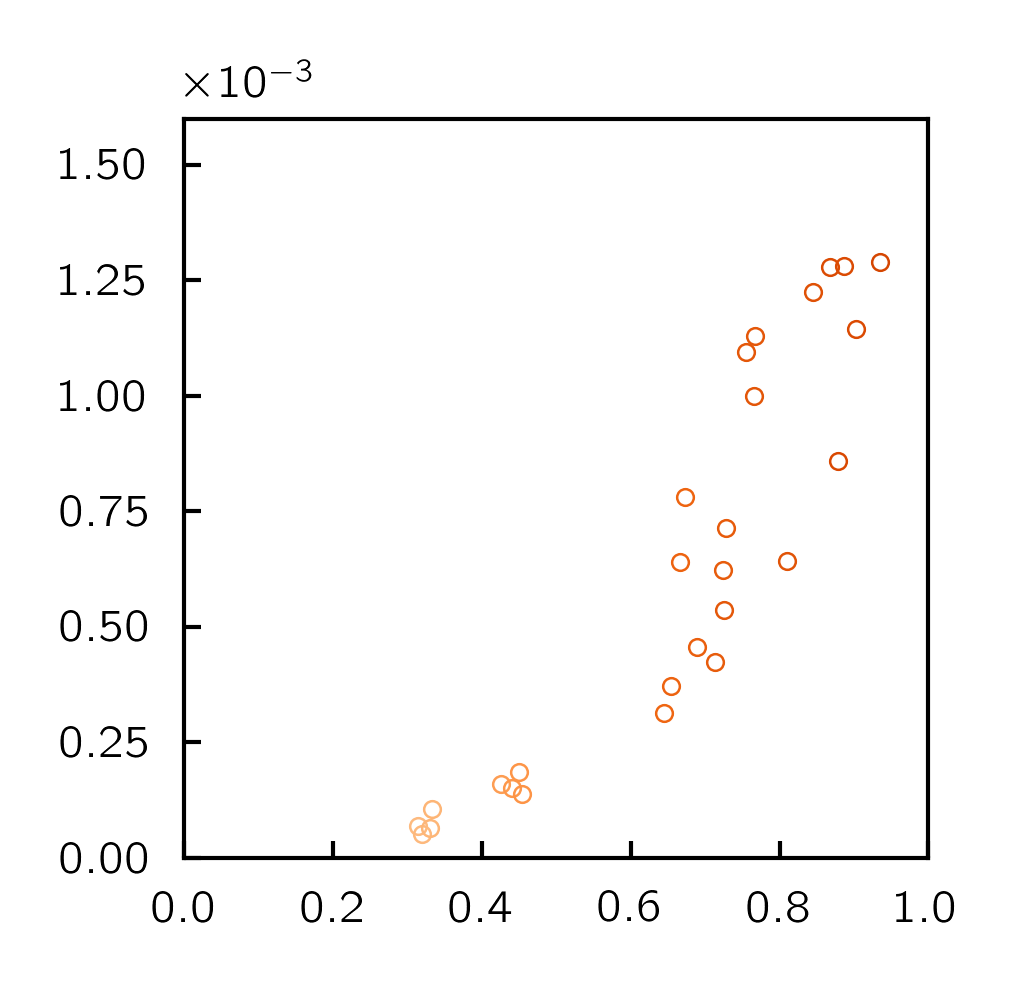

In [17]:
fig = plt.figure(figsize=[1.6,1.6]); ax = plt.gca()
for i in range(len(Phi_all)):
    ax.plot(Phi_all[i], dEdt_all[i], 'o', c=mpl.colormaps['Oranges']((sigma_all[i]-0.05)/(0.2-0.05)))  

plt.xlim([0,1])    
plt.ylim([0,0.0016])       
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))